In [1]:
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.stats as stats

def plot_binary_cal_curves(treatment):
    fig, axs = plt.subplots(1, 2, figsize = (16, 8))
    
    for idx, params in enumerate(zip(['crp', 'esr'], ['tab:blue', 'tab:orange'])):
        das_type, color = params
        
        axs[idx].plot((0, 1), (0, 1), alpha = 0.3, color = 'black', label = 'Perfect Calibration', linestyle = '--')
        
        apparent_res_struct = pickle.load(open(f'./data/results/{treatment}/class_poor/{das_type}_{treatment}_class_poor_apparent_eval.data', "rb"))
    
        prop_true = np.mean(np.array(apparent_res_struct['prop_trues']), axis = 0)
        prop_pred = np.mean(np.array(apparent_res_struct['prop_preds']), axis = 0)
    
        axs[idx].plot(prop_pred, prop_true, label = das_type, color = color)
    
    
        boot_files = glob.glob(f'./data/results/{treatment}/class_poor/bootstraps/{das_type}*.data')
        n_boot = len(boot_files)
    
        prop_preds = np.zeros((n_boot, 10))
        prop_trues = np.zeros((n_boot, 10))
    
        for boot_idx, boot_file in enumerate(boot_files):
            res_struct = pickle.load(open(boot_file, "rb"))
        
            boot_prop_true = np.median(np.array(res_struct['raw_prop_trues']), axis = 0)
            boot_prop_pred = np.median(np.array(res_struct['raw_prop_preds']), axis = 0)
        
            prop_trues[boot_idx, :] = boot_prop_true
            prop_preds[boot_idx, :] = boot_prop_pred
        
        boot_pred = np.mean(prop_preds, axis = 0)
        boot_true = np.mean(prop_trues, axis = 0)
    
        std_pred = np.std(prop_preds, axis = 0)
        std_true = np.std(prop_trues, axis = 0)
        
        axs[idx].plot(boot_pred, boot_true, linestyle = 'dotted', color = color)
    
        boot_pred[0] = boot_pred[0] - std_pred[0]
        boot_pred[-1] = boot_pred[-1] + std_pred[-1]
    
        axs[idx].fill_between(boot_pred, boot_true + std_true, boot_true - std_true, alpha = 0.1, color = color)
        axs[idx].title.set_text(das_type)
        axs[idx].set_xlabel('Predicted Outcome Probability')
        axs[idx].set_ylabel('Observed Outcome Probability')
    plt.savefig(f'binary_cal_curves_{treatment}.png', bbox_inches = 'tight')

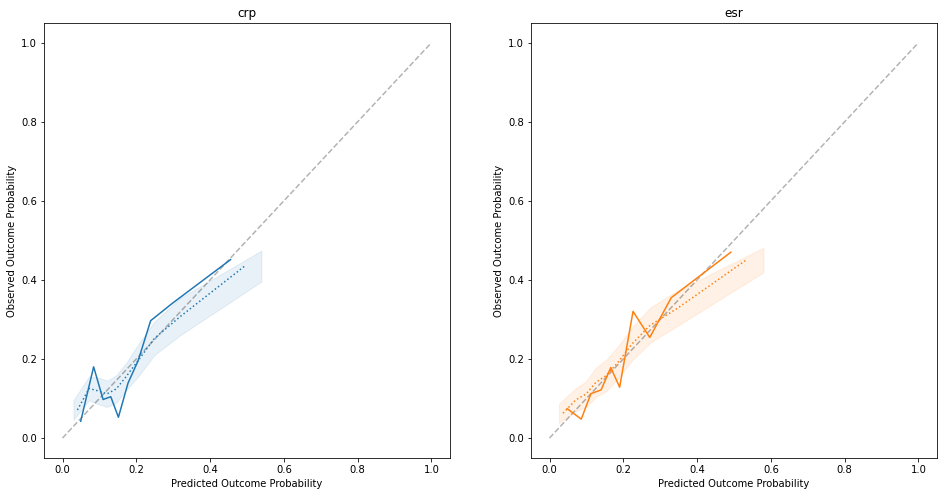

In [2]:
plot_binary_cal_curves('etanercept')

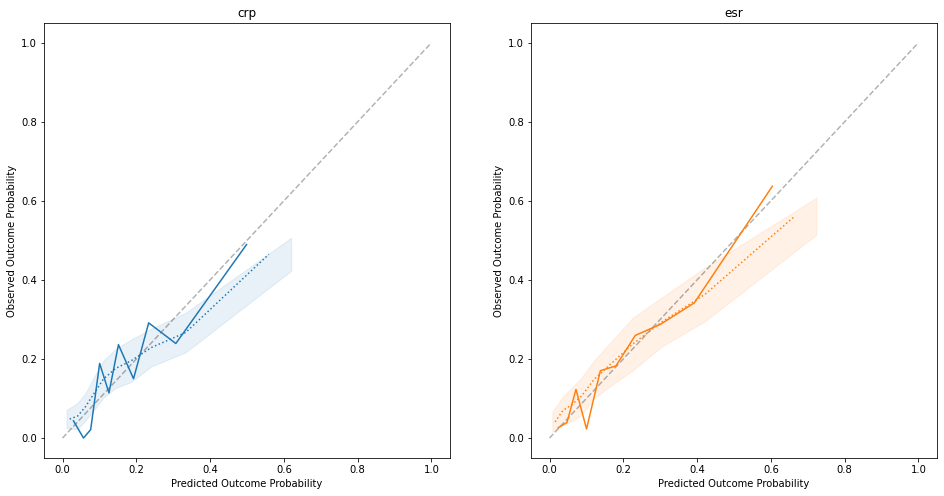

In [3]:
plot_binary_cal_curves('adalimumab')